# Star Wars Survey

Most people know of, or at least have heard of the great franchise known as the Star Wars series. Possibly one of the largest franchises of all time, Star Wars continues to enthrall its fans today. As the franchise continued to grow, debates began, and continue to arise over what part of the franchise is the best. Which film in the series was the franchise’s “Golden Age”? Is it the older films? Or is the franchise continually improving as it releases new material? As the release date for [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens) approached, the team at [FiveThirtyEight](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/) became curious about exploring various questions related to Star Wars fans. Using the SurveyMonkey online tool, they collected data from over 800 respondents. Ultimately, they compiled a large dataset containing the results of the survey.

In this short project, we will work with the `star_wars.csv` data set. It will be a short cleaning project, ending with a brief initial analysis. Our goal is to demonstrate data cleaning techniques with data acquired through crowd questioning, which is often quite dirtied and disorganized. Some techniques and tools that we will use are the `pandas.DataFrame.rename()` and `pandas.DataFrame.astype()` methods and bar graphs with the `%matplotlib inline`.

To begin, let's import our libraries and read into our data. We will also do a bit of exploring using the `.head()` function and `.columns` attribute.

### Importing and Exploring Our Data

In [123]:
import pandas as pd
import numpy as np

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [124]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [125]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

From the code above, we can see that several columns were created as a result of a multiple-choice question asked in the survey. These kinds of questions are very hard to store in CSV data, thus the answers were stored in several columns worth of data. However before we tackle that, we also notice that some of the simpler questions in the survey were answered with either yes or no. Converting the ‘yes’ and ‘no’ values into ‘True’ and ‘False’ values, known as Boolean values, will help our data be much easier to analyze later. The two columns we will convert to Boolean values are:

- 'Have you seen any of the 6 films in the Star Wars franchise?'
- 'Do you consider yourself to be a fan of the Star Wars film franchise?'

To convert the values in these columns to Boolean format, we will use a mapping dictionary that specifies which Boolean to convert each value into. Then, we will apply the dictionary to the column and reassign the improved column to the dataset. 

### Converting Values to Boolean & Renaming Columns

In [126]:
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False))
print('\n') # adds a new (empty) line after previous result

yes_no = {
    "Yes": True,
    "No": False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)

print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False))

Have you seen any of the 6 films in the Star Wars franchise?
Yes    936
No     250
Name: count, dtype: int64


Have you seen any of the 6 films in the Star Wars franchise?
True     936
False    250
Name: count, dtype: int64


In [127]:
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False))
print('\n') # adds a new (empty) line after previous result

star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False))

Do you consider yourself to be a fan of the Star Wars film franchise?
Yes    552
NaN    350
No     284
Name: count, dtype: int64


Do you consider yourself to be a fan of the Star Wars film franchise?
True     552
NaN      350
False    284
Name: count, dtype: int64


Now that we have accomplished converting the values from the Star Wars columns above to Boolean format, we will move on to do the same for the next set of multiple-choice answer columns. The columns follow this pattern:

- "Which of the following Star Wars films have you seen? Please select all that apply." — whether or not the respondent saw "Star Wars: Episode I The Phantom Menace"
- "Unnamed: 4" — whether or not the respondent saw "Star Wars: Episode II Attack of the Clones"
- "Unnamed: 5" — whether or not the respondent saw "Star Wars: Episode III Revenge of the Sith"
- "Unnamed: 6" — whether or not the respondent saw "Star Wars: Episode IV A New Hope"
- "Unnamed: 7" — whether or not the respondent saw "Star Wars: Episode V The Empire Strikes Back"
- "Unnamed: 8" — whether or not the respondent saw "Star Wars: Episode VI Return of the Jedi"

We will also rename each column as well, so they are easier to work with later.

In [128]:
print(star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'].value_counts(dropna=False))

yes_no = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False
}

star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'] = star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'].map(yes_no)

star_wars = star_wars.rename(columns={
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1'
})

star_wars['seen_1'].value_counts(dropna=False)

Which of the following Star Wars films have you seen? Please select all that apply.
Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: count, dtype: int64


seen_1
True     673
False    513
Name: count, dtype: int64

In [129]:
print(star_wars['Unnamed: 4'].value_counts(dropna=False))

yes_no = {
    "Star Wars: Episode II  Attack of the Clones": True,
    np.nan: False
}

star_wars['Unnamed: 4'] = star_wars['Unnamed: 4'].map(yes_no)

star_wars = star_wars.rename(columns={
    "Unnamed: 4": "seen_2"
})

star_wars['seen_2'].value_counts(dropna=False)

Unnamed: 4
NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: count, dtype: int64


seen_2
False    615
True     571
Name: count, dtype: int64

In [130]:
print(star_wars['Unnamed: 5'].value_counts(dropna=False))

yes_no = {
    "Star Wars: Episode III  Revenge of the Sith": True,
    np.nan: False
}

star_wars['Unnamed: 5'] = star_wars['Unnamed: 5'].map(yes_no)

star_wars = star_wars.rename(columns={
    "Unnamed: 5": "seen_3"
})

star_wars['seen_3'].value_counts(dropna=False)

Unnamed: 5
NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: count, dtype: int64


seen_3
False    636
True     550
Name: count, dtype: int64

In [131]:
print(star_wars['Unnamed: 6'].value_counts(dropna=False))

yes_no = {
    "Star Wars: Episode IV  A New Hope": True,
    np.nan: False
}

star_wars['Unnamed: 6'] = star_wars['Unnamed: 6'].map(yes_no)

star_wars = star_wars.rename(columns={
    "Unnamed: 6": "seen_4"
})

star_wars['seen_4'].value_counts(dropna=False)

Unnamed: 6
Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: count, dtype: int64


seen_4
True     607
False    579
Name: count, dtype: int64

In [132]:
print(star_wars['Unnamed: 7'].value_counts(dropna=False))

yes_no = {
    "Star Wars: Episode V The Empire Strikes Back": True,
    np.nan: False
}

star_wars['Unnamed: 7'] = star_wars['Unnamed: 7'].map(yes_no)

star_wars = star_wars.rename(columns={
    "Unnamed: 7": "seen_5"
})

star_wars['seen_5'].value_counts(dropna=False)

Unnamed: 7
Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: count, dtype: int64


seen_5
True     758
False    428
Name: count, dtype: int64

In [133]:
print(star_wars['Unnamed: 8'].value_counts(dropna=False))

yes_no = {
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan: False
}

star_wars['Unnamed: 8'] = star_wars['Unnamed: 8'].map(yes_no)

star_wars = star_wars.rename(columns={
    "Unnamed: 8": "seen_6"
})

star_wars['seen_6'].value_counts(dropna=False)

Unnamed: 8
Star Wars: Episode VI Return of the Jedi    738
NaN                                         448
Name: count, dtype: int64


seen_6
True     738
False    448
Name: count, dtype: int64

The next set of columns asks the respondent to rank the Star Wars movies, 1 being the movie they like the best and 6 being the movie they like the least. Since the values in these columns contain the number the respondent gave to each film, they don’t require much cleaning. Instead, we are going to simply rename each column, like we did with the previous columns. This will help there to be a form of constancy amongst the column names. The columns follow this pattern:

- "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film." - How much the respondent liked "Star Wars: Episode I The Phantom Menace"
- "Unnamed: 10" — How much the respondent liked "Star Wars: Episode II Attack of the Clones"
- "Unnamed: 11" — How much the respondent liked "Star Wars: Episode III Revenge of the Sith"
- "Unnamed: 12" — How much the respondent liked "Star Wars: Episode IV A New Hope"
- "Unnamed: 13" — How much the respondent liked "Star Wars: Episode V The Empire Strikes Back"
- "Unnamed: 14" — How much the respondent liked "Star Wars: Episode VI Return of the Jedi"

In [134]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1"
})

star_wars = star_wars.rename(columns={
    "Unnamed: 10": "ranking_2"
})

star_wars = star_wars.rename(columns={
    "Unnamed: 11": "ranking_3"
})

star_wars = star_wars.rename(columns={
    "Unnamed: 12": "ranking_4"
})

star_wars = star_wars.rename(columns={
    "Unnamed: 13": "ranking_5"
})

star_wars = star_wars.rename(columns={
    "Unnamed: 14": "ranking_6"
})

print(star_wars.columns[9:15])

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')


### Bar Graphs

As you can see from the code above we have successfully renamed and converted multiple columns into the Boolean format. Now as we approach our analysis, the Boolean values will be very beneficial because the “True” and “False” values translate to 1 and 0 in the pandas program. In other words, we can generate bar graphs to visualize Boolean columns. Bar graphs will show us how many 1s (“True” values) and 0s (“False” values) there are in a Boolean column. 

In this next section of our project, we will be generating many bar graphs to examine different aspects of our data. First, let’s start by examining which one of the 6 movies is ranked the highest.

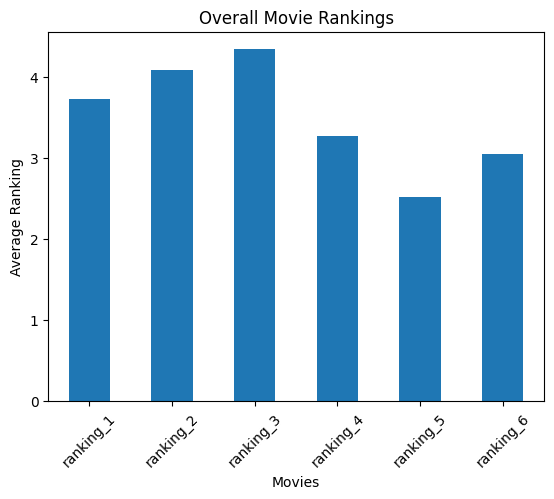

In [135]:
# Comparing the overall rankings of the 6 films

rankings = star_wars.iloc[:, 9:15]
rankings = rankings.apply(lambda x: x.mean())

import matplotlib.style as style
import matplotlib.pyplot as plt
%matplotlib inline


rankings.plot.bar()
plt.title("Overall Movie Rankings")
plt.xlabel("Movies")
plt.ylabel("Average Ranking")
plt.xticks(rotation=45)
plt.show()

The results above show that “ranking_3” is closest to 4, while “ranking_5” is closest to 1. It is important to note that a ranking closer to 1 is preferred. From this graph, we can conclude that “ranking_5” or “Star Wars: Episode V The Empire Strikes Back” received the highest ranking in the survey. 

With the highest-ranked movie possibly identified, let’s look deeper into our data to verify if this is true. In the code below, we will generate a bar graph showing the number of views each film has. If  “Star Wars: Episode V The Empire Strikes Back” is indeed voted as America’s favorite, it will also have the most views.

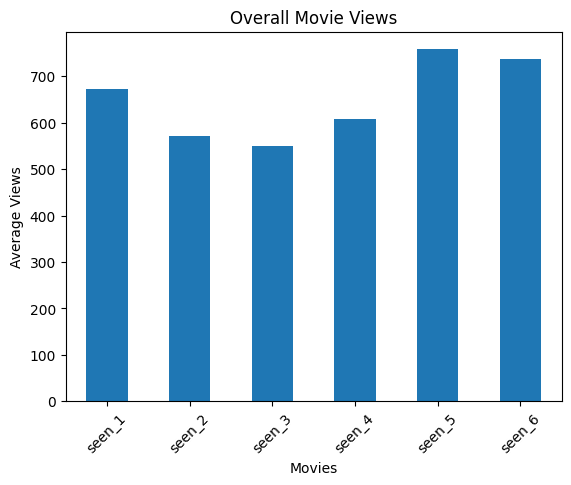

In [136]:
# Comparing the number of views each movie has

seen = star_wars.iloc[:, 3:9]
seen_most = seen.apply(lambda x: x.sum())

seen_most.plot.bar()
plt.title("Overall Movie Views")
plt.xlabel("Movies")
plt.ylabel("Average Views")
plt.xticks(rotation=45)
plt.show()

As expected, the results above confirm “Star Wars: Episode V The Empire Strikes Back” as #1 with the most views. Now that we have established America’s favorite out of the films in this survey, let’s go on to examine the rankings and views of the movies when the dataset is filtered in different ways. For example, how are the movies ranked by all the male respondents? In the code below, we will generate several bar graphs containing the rankings and most-seen movies through various dataset filters, starting with male vs. female respondents.

### Male Vs. Female

In [137]:
# Filtering original dataset
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

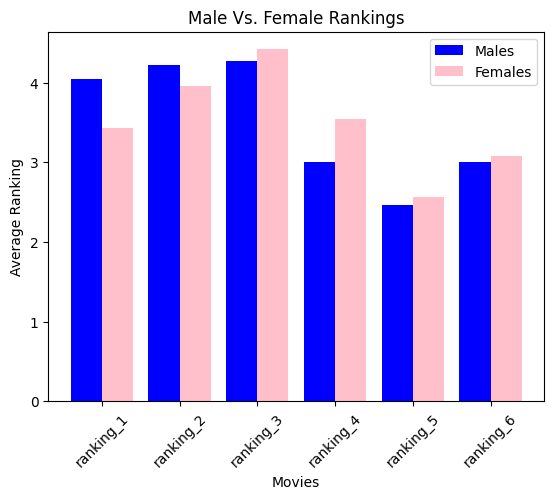

In [138]:
X_rank = ['ranking_1','ranking_2','ranking_3','ranking_4','ranking_5','ranking_6'] 
rankings_m = males.iloc[:, 9:15]
rankings_m = rankings_m.apply(lambda x: x.mean())
rankings_f = females.iloc[:, 9:15]
rankings_f = rankings_f.apply(lambda x: x.mean())
  
X_axis = np.arange(len(X_rank)) 
  
plt.bar(X_axis - 0.2, rankings_m, 0.4, label = 'Males', color='blue') 
plt.bar(X_axis + 0.2, rankings_f, 0.4, label = 'Females', color='pink') 
  
plt.xticks(X_axis, X_rank) 
plt.xlabel("Movies") 
plt.ylabel("Average Ranking") 
plt.title("Male Vs. Female Rankings") 
plt.xticks(rotation=45)
plt.legend() 
plt.show()

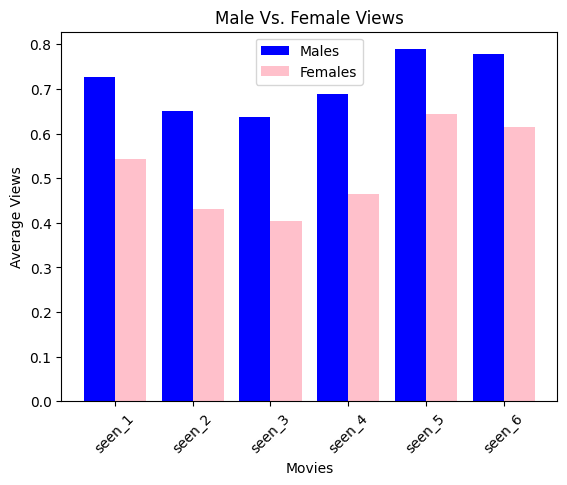

In [139]:
X_view = ['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6'] 
views_m = males.iloc[:, 3:9]
views_m = views_m.apply(lambda x: x.mean())
views_f = females.iloc[:, 3:9]
views_f = views_f.apply(lambda x: x.mean())
  
X_axis = np.arange(len(X_view)) 
  
plt.bar(X_axis - 0.2, views_m, 0.4, label = 'Males', color='blue') 
plt.bar(X_axis + 0.2, views_f, 0.4, label = 'Females', color='pink') 
  
plt.xticks(X_axis, X_view) 
plt.xlabel("Movies") 
plt.ylabel("Average Views") 
plt.title("Male Vs. Female Views") 
plt.xticks(rotation=45)
plt.legend() 
plt.show()

From the two graphs above, we can see that both the male and female respondents generally ranked the films in a similar pattern. However, the females ranked "The Phantom Menace" ("ranking_1") much higher than the males did, while the males ranked "A New Hope" ("ranking_4") much higher than the females did. Also, the male respondents ranked "Star Wars: Episode V The Empire Strikes Back" slightly higher than the female respondents did. In regards to the "Male Vs. Female Views" graph, the main thing we noticed was that the male respondents view all the movies significantly more than the females do.

Now that we have studied the male vs. female respondent data, let's move on to examine respondents who are fans of Star Wars, versus those who are not.

### Star Wars Fans Vs. Star Wars Nonfans

In [140]:
# Filtering original dataset
sw_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
sw_nonfan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

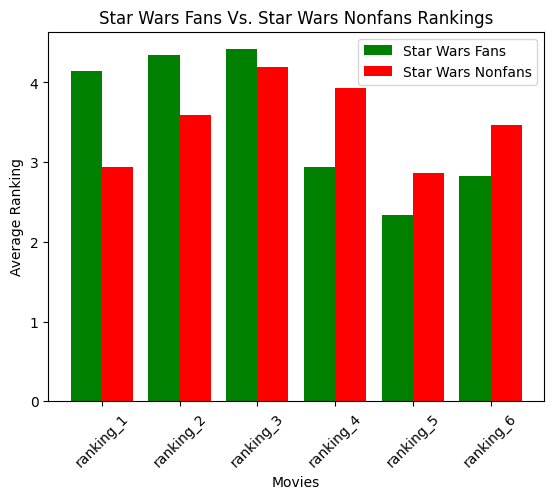

In [141]:
X_rank = ['ranking_1','ranking_2','ranking_3','ranking_4','ranking_5','ranking_6'] 
rank_sw_fan = sw_fan.iloc[:, 9:15]
rank_sw_fan = rank_sw_fan.apply(lambda x: x.mean())
rank_sw_nonfan = sw_nonfan.iloc[:, 9:15]
rank_sw_nonfan = rank_sw_nonfan.apply(lambda x: x.mean())
  
X_axis = np.arange(len(X_rank)) 
  
plt.bar(X_axis - 0.2, rank_sw_fan, 0.4, label = 'Star Wars Fans', color='green') 
plt.bar(X_axis + 0.2, rank_sw_nonfan, 0.4, label = 'Star Wars Nonfans', color='red') 
  
plt.xticks(X_axis, X_rank) 
plt.xlabel("Movies") 
plt.ylabel("Average Ranking") 
plt.title("Star Wars Fans Vs. Star Wars Nonfans Rankings") 
plt.xticks(rotation=45)
plt.legend()
plt.show()

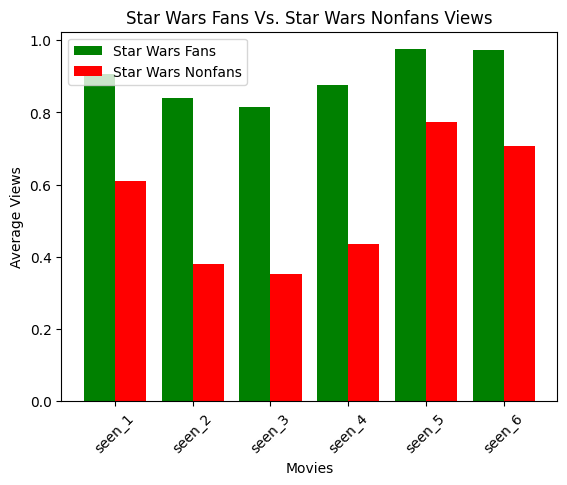

In [142]:
X_view = ['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6'] 
views_sw_fan = sw_fan.iloc[:, 3:9]
views_sw_fan = views_sw_fan.apply(lambda x: x.mean())
views_sw_nonfan = sw_nonfan.iloc[:, 3:9]
views_sw_nonfan = views_sw_nonfan.apply(lambda x: x.mean())
  
X_axis = np.arange(len(X_view)) 
  
plt.bar(X_axis - 0.2, views_sw_fan, 0.4, label = 'Star Wars Fans', color='green') 
plt.bar(X_axis + 0.2, views_sw_nonfan, 0.4, label = 'Star Wars Nonfans', color='red') 
  
plt.xticks(X_axis, X_view) 
plt.xlabel("Movies") 
plt.ylabel("Average Views") 
plt.title("Star Wars Fans Vs. Star Wars Nonfans Views") 
plt.xticks(rotation=45)
plt.legend()
plt.show()

In studying the two graphs above, we observe that Star Wars fans rank films 1-3 much lower than 4-6. Star Wars nonfans, however, rank 1, 5, and 6, lower than 2-4. In the "Views" graph, we see that nonfans watch the films much less than the fans. However, the nonfans do watch films 5 & 6 more than 1-4. As for the official fans, they watch films 1, 5, and 6 most. Once again both of these groups identify "ranking_5" as the best out of the six.

For our last set of bar graphs, we are going to compare respondents who are fans of the Star Trek franchise, versus those who are not.

### Star Trek Fans Vs. Star Trek Nonfans

In [143]:
st_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
st_nonfan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No"]

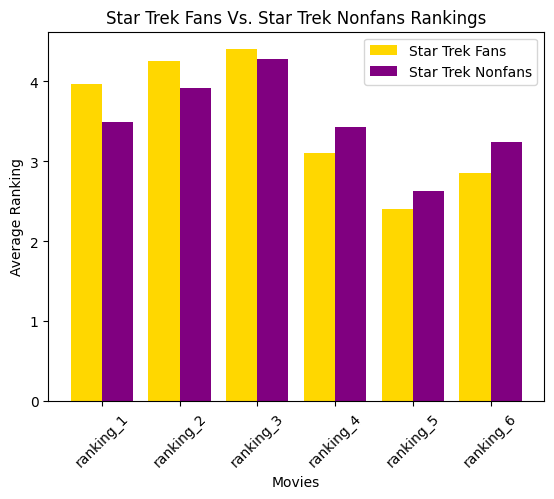

In [144]:
X_rank = ['ranking_1','ranking_2','ranking_3','ranking_4','ranking_5','ranking_6'] 
rank_st_fan = st_fan.iloc[:, 9:15]
rank_st_fan = rank_st_fan.apply(lambda x: x.mean())
rank_st_nonfan = st_nonfan.iloc[:, 9:15]
rank_st_nonfan = rank_st_nonfan.apply(lambda x: x.mean())
  
X_axis = np.arange(len(X_rank)) 
  
plt.bar(X_axis - 0.2, rank_st_fan, 0.4, label = 'Star Trek Fans', color='gold') 
plt.bar(X_axis + 0.2, rank_st_nonfan, 0.4, label = 'Star Trek Nonfans', color='purple') 

plt.xticks(X_axis, X_rank) 
plt.xlabel("Movies") 
plt.ylabel("Average Ranking") 
plt.title("Star Trek Fans Vs. Star Trek Nonfans Rankings") 
plt.xticks(rotation=45)
plt.legend()
plt.show()

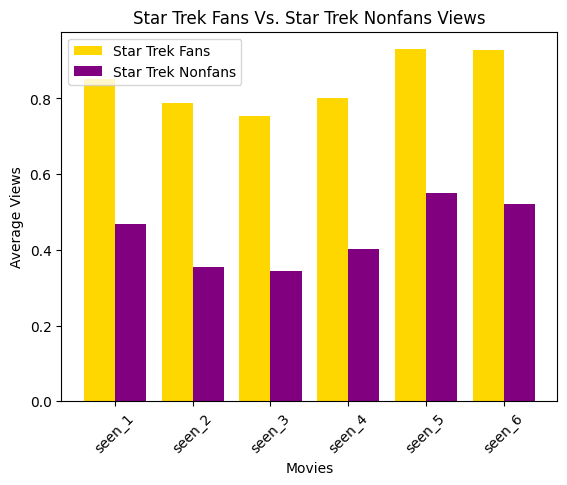

In [145]:
X_view = ['seen_1','seen_2','seen_3','seen_4', 'seen_5', 'seen_6'] 
views_st_fan = st_fan.iloc[:, 3:9]
views_st_fan = views_st_fan.apply(lambda x: x.mean())
views_st_nonfan = st_nonfan.iloc[:, 3:9]
views_st_nonfan = views_st_nonfan.apply(lambda x: x.mean())
  
X_axis = np.arange(len(X_view)) 
  
plt.bar(X_axis - 0.2, views_st_fan, 0.4, label = 'Star Trek Fans', color='gold') 
plt.bar(X_axis + 0.2, views_st_nonfan, 0.4, label = 'Star Trek Nonfans', color='purple') 
  
plt.xticks(X_axis, X_view) 
plt.xlabel("Movies") 
plt.ylabel("Average Views") 
plt.title("Star Trek Fans Vs. Star Trek Nonfans Views") 
plt.xticks(rotation=45)
plt.legend()
plt.show()

As we observe the results above, one thing we notice right away is that the Star Trek fans rank 4-6 higher than the nonfans, while the nonfans rank 1-3 higher than the fans. In our previous comparisons, we observed a significant difference in the number of views. However, in this case, the view count for Star Trek fans is so dramatically larger that it immediately captures our attention. Although the Star Trek nonfans seem less than enthusiastic about the six films, both groups once again agree that the 5th is the best.

### Conclusion

Throughout this project, we have demonstrated several data cleaning and analysis techniques. During our visualization process, we found that "Star Wars: Episode V The Empire Strikes Back" was unanimously the most popular film out of the group covered in the survey. Whether that's due to the film's structure or its plot twists in the Star Wars saga, films that follow this survey face a significant challenge to live up to this high standard. In the future, as we analyze more survey datasets, it is crucial to recognize the importance of data cleaning and comparison. Comparing different aspects of one’s dataset, after a thorough cleaning, is essential to creating an accurate analysis of any large dataset.